In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import random

## Binary SA

**Problem:** Min One
$$
\min{z} = f(x) = \begin{equation*}
\sum_{i=1}^n x_i \end{equation*}
$$

$$
x_i \in \{0, 1\}
$$

Improve SA quality:

Application in high dimension (more complex) problems when one sulution does not work well.

- How to improve?

### 1. Making parallel SA under one algorithm (no interaction between solutions)

<img src="Picture1.png" width="400">


Note: In this case the best solution out of 3 will be best solution for the next iteration.

In [12]:
import random
import math

def objective_function(x):
    return sum(x)

def generate_neighbor(x):
    neighbor = x.copy()
    index = random.randint(0, len(neighbor) - 1)
    neighbor[index] = 1 - neighbor[index]  # Flip the bit (0 -> 1 or 1 -> 0)
    return neighbor

def simulated_annealing(initial_solution, temp, cooling_rate, iterations):
    current_solution = initial_solution
    current_value = objective_function(current_solution)

    best_solution = current_solution
    best_value = current_value

    for i in range(iterations):

        neighbor = generate_neighbor(current_solution)
        neighbor_value = objective_function(neighbor)
        if neighbor_value < current_value or random.random() < math.exp((current_value - neighbor_value) / temp):
            current_solution, current_value = neighbor, neighbor_value
        if current_value < best_value:
            best_solution, best_value = current_solution, current_value
        temp *= cooling_rate

    return best_solution, best_value


n = 10
initial_solution = [random.randint(0, 1) for _ in range(n)]  # Random initial binary vector
temp = 100
cooling_rate = 0.95
iterations = 1000

best_solution, best_value = simulated_annealing(initial_solution, temp, cooling_rate, iterations)
print(f"Initial Solution: {initial_solution}, Initial Value: {objective_function(initial_solution)}")
print(f"Best Solution: {best_solution}, Best Value: {best_value}")

Initial Solution: [1, 1, 1, 1, 0, 1, 1, 1, 0, 0], Initial Value: 7
Best Solution: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], Best Value: 0


### 2. Making SA based on population by interaction.

<img src="Picture2.png" width="400">

Note: In this case at each time we make several neighbours, then compare the best neighbours by current solutions.

In [10]:
import random
import math

def objective_function(x):
    return sum(x)

def generate_neighbor(x):
    neighbor = x.copy()
    index = random.randint(0, len(neighbor) - 1)
    neighbor[index] = 1 - neighbor[index]  # Flip the bit (0 -> 1 or 1 -> 0)
    return neighbor

def simulated_annealing(initial_solution, temp, cooling_rate, iterations):
    current_solution = initial_solution
    current_value = objective_function(current_solution)

    best_solution = current_solution
    best_value = current_value

    for i in range(iterations):
        neighbor = generate_neighbor(current_solution)
        neighbor_value = objective_function(neighbor)
        if neighbor_value < current_value or random.random() < math.exp((current_value - neighbor_value) / temp):
            current_solution, current_value = neighbor, neighbor_value
        if current_value < best_value:
            best_solution, best_value = current_solution, current_value
        temp *= cooling_rate

    return best_solution, best_value

def parallel_sa(num_processes, initial_solutions, temp, cooling_rate, iterations):
    """Parallel Simulated Annealing with multiple independent processes."""
    best_global_solution = None
    best_global_value = float('inf')

    for i in range(num_processes):
        current_solution = initial_solutions[i]
        best_solution, best_value = simulated_annealing(current_solution, temp, cooling_rate, iterations)
        if best_value < best_global_value:
            best_global_solution, best_global_value = best_solution, best_value

    return best_global_solution, best_global_value


n = 10
num_processes = 3
initial_solutions = [[random.randint(0, 1) for _ in range(n)] for _ in range(num_processes)]  # Random binary initial solutions
temp = 100
cooling_rate = 0.95
iterations = 1000

best_solution, best_value = parallel_sa(num_processes, initial_solutions, temp, cooling_rate, iterations)
print(f"Best Global Solution: {best_solution}, Best Global Value: {best_value}")

Best Global Solution: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], Best Global Value: 0


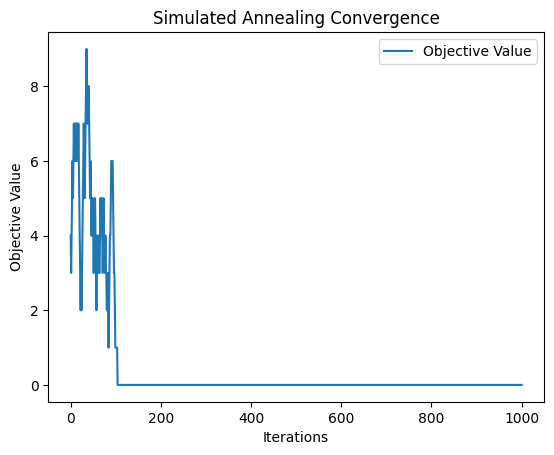

Best Solution: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], Best Value: 0


In [11]:
import matplotlib.pyplot as plt

def simulated_annealing_with_plot(initial_solution, temp, cooling_rate, iterations):
    current_solution = initial_solution
    current_value = objective_function(current_solution)
    values = [current_value]

    for i in range(iterations):
        neighbor = generate_neighbor(current_solution)
        neighbor_value = objective_function(neighbor)

        if neighbor_value < current_value or random.random() < math.exp((current_value - neighbor_value) / temp):
            current_solution, current_value = neighbor, neighbor_value

        values.append(current_value)
        temp *= cooling_rate

    plt.plot(range(iterations + 1), values, label="Objective Value")
    plt.xlabel("Iterations")
    plt.ylabel("Objective Value")
    plt.title("Simulated Annealing Convergence")
    plt.legend()
    plt.show()

    return current_solution, current_value

# Example usage
initial_solution = [random.randint(0, 1) for _ in range(10)]
temp = 100
cooling_rate = 0.95
iterations = 1000

best_solution, best_value = simulated_annealing_with_plot(initial_solution, temp, cooling_rate, iterations)
print(f"Best Solution: {best_solution}, Best Value: {best_value}")

### 3. Now let's combine steps 1 and 2 together in one algorithm.

In this case, for SA based on population with interaction.

<img src="Picture3.png" width="400">

Note: Now we have 3 parents and 12 neighbours, then compare each parent by all neighbours by SA mechanism.

- SA based on population steps:

1. Generate initial population and evaluate
2. Define the best solution out of them
3. Adjust the initial temprature $T=T0$
4. Repeat steps *4.1* to *4.4* for a specific number of iterations
    
    4.1. For each member of the population generate specific number of neighbours.
    
    4.2. Sort all neighbours and the best members to the number of population are elected.
    
    4.3. each member of the population will be compared by these winner neighbours
    
    4.4 Update the best solution ever found

5. Reduce the temprature and return to step 4 (if it's needed)

Initial Population:
  Solution 1: [1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1], Value: 13
  Solution 2: [0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0], Value: 9
  Solution 3: [1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1], Value: 13
  Solution 4: [1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0], Value: 14
  Solution 5: [1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0], Value: 6
  Solution 6: [0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0], Value: 9
  Solution 7: [0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0], Value: 8
  Solution 8: [1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], Value: 10
  Solution 9: [0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0], Value: 9
  Solution 10: [0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0], Value: 9
Initial Best Solution: [1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0], Best Value: 6
Initial Temperature: 100
-

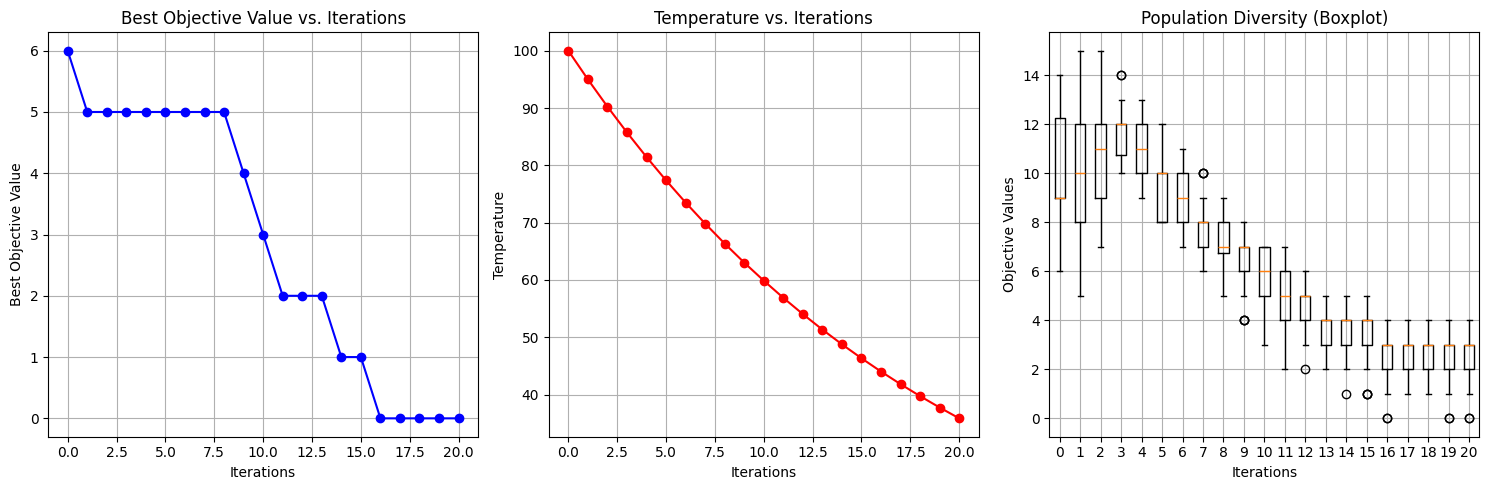

Final Best Solution: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], Final Best Value: 0


In [14]:
import random
import math
import matplotlib.pyplot as plt

def objective_function(x):
    return sum(x)

def generate_neighbor(x):
    neighbor = x.copy()
    index = random.randint(0, len(neighbor) - 1)
    neighbor[index] = 1 - neighbor[index]
    return neighbor

def generate_initial_population(pop_size, n):
    return [[random.randint(0, 1) for _ in range(n)] for _ in range(pop_size)]

def evaluate_population(population):
    return [objective_function(x) for x in population]

def select_best(population, values, num_best):
    combined = list(zip(population, values))
    combined.sort(key=lambda x: x[1])
    return [x[0] for x in combined[:num_best]]

def population_based_sa(pop_size, n, num_neighbors, temp, cooling_rate, iterations):
    best_values = []
    temperatures = []
    population_diversity = []


    population = generate_initial_population(pop_size, n)
    values = evaluate_population(population)
    best_solution = population[values.index(min(values))]
    best_value = min(values)
    T = temp
    best_values.append(best_value)
    temperatures.append(T)
    population_diversity.append(values)

    print("Initial Population:")
    for i, (sol, val) in enumerate(zip(population, values)):
        print(f"  Solution {i+1}: {sol}, Value: {val}")
    print(f"Initial Best Solution: {best_solution}, Best Value: {best_value}")
    print(f"Initial Temperature: {T}")
    print("-" * 50)

    for iteration in range(iterations):
        new_population = []
        new_values = []
        for i in range(pop_size):
            current_solution = population[i]
            current_value = values[i]

            neighbors = [generate_neighbor(current_solution) for _ in range(num_neighbors)]
            neighbor_values = evaluate_population(neighbors)
            candidates = neighbors + [current_solution]
            candidate_values = neighbor_values + [current_value]


            best_candidates = select_best(candidates, candidate_values, pop_size)
            new_population.extend(best_candidates)
            new_values.extend([objective_function(x) for x in best_candidates])


        current_best_value = min(new_values)
        if current_best_value < best_value:
            best_solution = new_population[new_values.index(current_best_value)]
            best_value = current_best_value


        population = new_population
        values = new_values


        T *= cooling_rate


        best_values.append(best_value)
        temperatures.append(T)
        population_diversity.append(values)


        print(f"Iteration {iteration + 1}:")
        print(f"  Temperature: {T}")
        print(f"  Best Solution: {best_solution}, Best Value: {best_value}")
        print("  Population:")
        for i, (sol, val) in enumerate(zip(population, values)):
            print(f"    Solution {i+1}: {sol}, Value: {val}")
        print("-" * 50)


    plt.figure(figsize=(15, 5))


    plt.subplot(1, 3, 1)
    plt.plot(range(iterations + 1), best_values, marker='o', color='b')
    plt.xlabel("Iterations")
    plt.ylabel("Best Objective Value")
    plt.title("Best Objective Value vs. Iterations")
    plt.grid()


    plt.subplot(1, 3, 2)
    plt.plot(range(iterations + 1), temperatures, marker='o', color='r')
    plt.xlabel("Iterations")
    plt.ylabel("Temperature")
    plt.title("Temperature vs. Iterations")
    plt.grid()


    plt.subplot(1, 3, 3)
    plt.boxplot(population_diversity, positions=range(iterations + 1))
    plt.xlabel("Iterations")
    plt.ylabel("Objective Values")
    plt.title("Population Diversity (Boxplot)")
    plt.grid()

    plt.tight_layout()
    plt.show()

    return best_solution, best_value

# Example

pop_size = 10
n = 20
num_neighbors = 5
temp = 100
cooling_rate = 0.95
iterations = 20

best_solution, best_value = population_based_sa(pop_size, n, num_neighbors, temp, cooling_rate, iterations)
print(f"Final Best Solution: {best_solution}, Final Best Value: {best_value}")